In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import kmedoids

from scipy.io import arff
from sklearn import cluster
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import manhattan_distances
from sklearn.metrics import silhouette_score
from sklearn.metrics import rand_score
from sklearn.metrics import mutual_info_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

C:\Users\Utilisateur\anaconda3\envs\ApprNonSupperv\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


Kmean function

In [2]:
def kmean(k,datanp):
    tps1 = time.time()

    model = cluster.KMeans(n_clusters = k, init = 'k-means++')

    model.fit(datanp)
    tps2 = time.time()
    labels = model.labels_
    iteration = model.n_iter_
    return labels,tps1,tps2,iteration,k,datanp,model

Display the result of a kmean or kmedoids function

In [3]:
def displayK(kList, name):
    labels,tps1,tps2,iteration,k,data,model = kList
    f0 = [f[0] for f in data]
    f1 = [f[1] for f in data]
    plt.scatter(f0, f1, c=labels, s=8)
    plt.title("Donnees apres clustering "+name)
    plt.show()
    print("nb clusters = ",k,", nb iter = ",iteration,", runtime = ",round((tps2-tps1)*1000,2)," ms")

In [4]:
#Creation d'un graphique
def graph(l,name,min_cluster):
    plt.bar([i for i in range(min_cluster,len(l)+min_cluster)],l)
    plt.title('Indice de '+name)
    plt.xlabel('# of Clusters')
    plt.ylabel('Score')
    plt.show()

Sil score to optimise number of cluster (kmean)

In [5]:
def displayKmeanSilScore(datanp,min_cluster,max_cluster):
    sil_score_list = []
    dv_score_list = []
    ch_score_list = []
    tps1 = time.time()
    for i in range(min_cluster,max_cluster):
        km = KMeans(n_clusters=i)
        km.fit(datanp)
        sil_score = silhouette_score(np.array(datanp),km.predict(datanp))
        dv_score  = davies_bouldin_score(np.array(datanp),km.predict(datanp))
        ch_score  = calinski_harabasz_score(np.array(datanp),km.predict(datanp))
        sil_score_list.append(sil_score)
        dv_score_list.append(dv_score)
        ch_score_list.append(ch_score)
    tps2 = time.time()
    print("Silhouette SCORE :")
    graph(sil_score_list, "Silhouette",min_cluster)
    nbMax = np.max(sil_score_list) # Le meilleur score est le maximum
    indexMax = sil_score_list.index(nbMax) + min_cluster
    print("Nombre clusters = ",indexMax)

    #Courbe Davies-Bouldin
    print()
    print("Davies-Bouldin SCORE :")
    graph(dv_score_list, "Davies-Bouldin",min_cluster)
    nbMax = np.min(dv_score_list) # Le meilleur score est le minimum
    indexMax = dv_score_list.index(nbMax) + min_cluster
    print("Nombre clusters = ",indexMax)

    #Courbe Calinski-Harabasz
    print()
    print("Calinski-Harabasz SCORE :")
    graph(ch_score_list, "Calinski-Harabasz",min_cluster)
    nbMax = np.max(ch_score_list)# Le score est le maximum
    indexMax = ch_score_list.index(nbMax) + min_cluster
    print("Nombre clusters = ",indexMax)
    print("nb clusters = ",indexMax, ", runtime = ",round((tps2-tps1)*1000,2)," ms")
    return indexMax

Kmedoids function

In [6]:
def kmedoid(k,data):
    tps1 = time.time()
    distmatrix = euclidean_distances(data)
    fp = kmedoids.fasterpam(distmatrix,k)
    tps2 = time.time()
    iter_kmed=fp.n_iter
    labels_kmed = fp.labels
    return labels_kmed,tps1,tps2,iter_kmed,k,data,fp

Sil score to optimise number of cluster (kmedoids)

In [7]:
def displayKmedoidsSilScore(datanp,min_cluster,max_cluster):
    sil_score_list = []
    tps1 = time.time()
    dv_score_list = []
    ch_score_list = []
    for i in range(min_cluster,max_cluster):
        labels_kmed,t1,t2,iter_kmed,k,data,model= kmedoid(i,datanp)
        labels = model.labels
        sil_score = silhouette_score(np.array(datanp),labels)
        dv_score  = davies_bouldin_score(np.array(datanp),labels)
        ch_score  = calinski_harabasz_score(np.array(datanp),labels)
        sil_score_list.append(sil_score)
        dv_score_list.append(dv_score)
        ch_score_list.append(ch_score)
    tps2 = time.time()
    print("Silhouette SCORE :")
    graph(sil_score_list, "Silhouette",min_cluster)
    nbMax = np.max(sil_score_list) # Le meilleur score est le maximum
    indexMax = sil_score_list.index(nbMax) + min_cluster
    print("Nombre clusters = ",indexMax)

    #Courbe Davies-Bouldin
    print()
    print("Davies-Bouldin SCORE :")
    graph(dv_score_list, "Davies-Bouldin",min_cluster)
    nbMax = np.min(dv_score_list) # Le meilleur score est le minimum
    indexMax = dv_score_list.index(nbMax) + min_cluster
    print("Nombre clusters = ",indexMax)

    #Courbe Calinski-Harabasz
    print()
    print("Calinski-Harabasz SCORE :")
    graph(ch_score_list, "Calinski-Harabasz",min_cluster)
    nbMax = np.max(ch_score_list)# Le score est le maximum
    indexMax = ch_score_list.index(nbMax) + min_cluster
    print("Nombre clusters = ",indexMax)
    print("nb clusters = ",indexMax, ", runtime = ",round((tps2-tps1)*1000,2)," ms")
    return indexMax



In [8]:
def cluster_agglo(datanp,distance_treshold, linkage, nb_cluster):
    tps1 = time.time()
    model = cluster.AgglomerativeClustering(distance_threshold=distance_treshold, linkage=linkage,
                                            n_clusters=nb_cluster)
    model = model.fit(datanp)
    tps2 = time.time()
    runtime = round((tps2 - tps1) * 1000, 2)
    return model, runtime

In [9]:
def displayClusterScore(datanp,nb_cluster):
    sil_score_list = []
    dv_score_list = []
    ch_score_list = []
    runtime_list = []
    tps1 = time.time()
    for i in ['single', 'average', 'complete', 'ward']:
        model, runtime=cluster_agglo(datanp,None, i, nb_cluster)
        model=model.fit(datanp)
        sil_score = silhouette_score(np.array(datanp),model.labels_)

        sil_score_list.append(sil_score)
        runtime_list.append(runtime)
    tps2 = time.time()
    print("Silhouette SCORE :")
    graph(sil_score_list, "Silhouette",0)
    nbMax = np.max(sil_score_list) # Le meilleur score est le maximum
    indexMax = sil_score_list.index(nbMax)
    print("Nombre clusters = ",indexMax)
    method = ['single', 'average', 'complete', 'ward']
    model, runtime=cluster_agglo(datanp,None, method[indexMax], nb_cluster)
    model=model.fit(datanp)
    f0 = [f[0] for f in datanp]
    f1 = [f[1] for f in datanp]
    plt.scatter(f0, f1, c=model.labels_, s=8)
    plt.title("Donnees apres clustering clustering ")
    plt.show()

    print("nb clusters = ",indexMax, ", runtime = ",round((tps2-tps1)*1000,2)," ms")

import data

In [10]:
def importData(name):
    databrut = np.loadtxt("./dataset-rapport/"+name+".txt")
    data = [[x[0], x[1]] for x in databrut]

    f0 = [f[0] for f in data]
    f1 = [f[1] for f in data]
    plt.scatter(f0, f1, s=8)
    plt.title("Donnees initiales")
    plt.show()
    return data


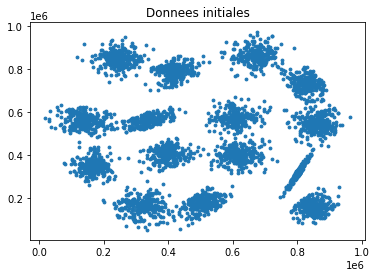

In [11]:
dataX1 = importData("x1")

KMEAN
Silhouette SCORE :


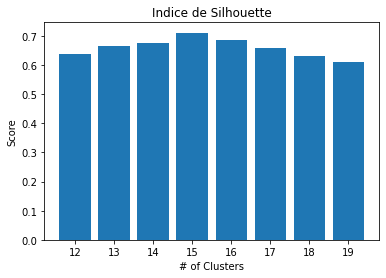

Nombre clusters =  15

Davies-Bouldin SCORE :


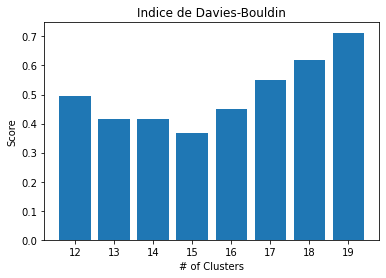

Nombre clusters =  15

Calinski-Harabasz SCORE :


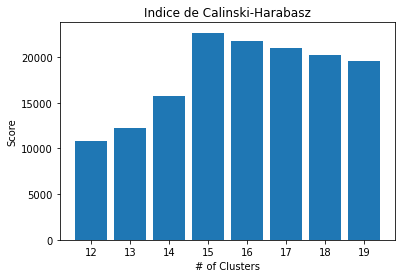

Nombre clusters =  15
nb clusters =  15 , runtime =  6051.42  ms


In [12]:
print("KMEAN")
nbClusterKMean = displayKmeanSilScore(dataX1,12,20)

runtime =  304.21  ms


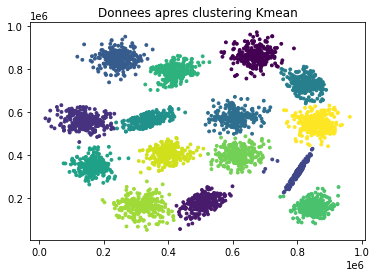

nb clusters =  15 , nb iter =  3 , runtime =  304.21  ms
Silhouette SCORE :


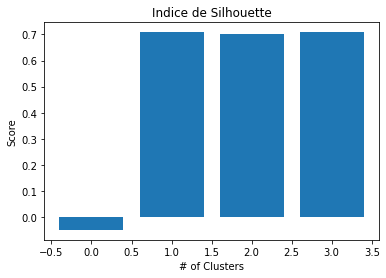

Nombre clusters =  3


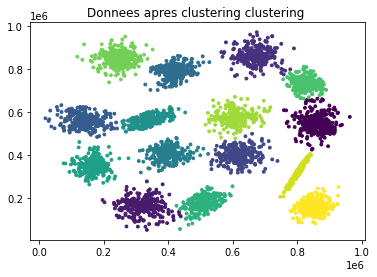

nb clusters =  3 , runtime =  4102.26  ms


In [13]:
tps1 = time.time()
temp = kmean(nbClusterKMean,dataX1)
tps2 = time.time()
print("runtime = ",round((tps2-tps1)*1000,2)," ms")
displayK(temp,"Kmean")
displayClusterScore(dataX1,nbClusterKMean)

KMEDOIDS
Silhouette SCORE :


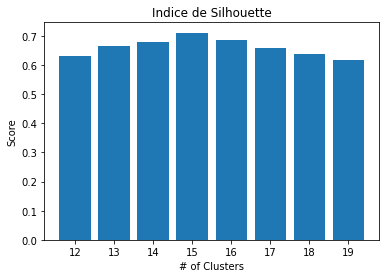

Nombre clusters =  15

Davies-Bouldin SCORE :


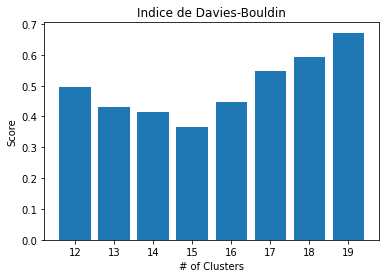

Nombre clusters =  15

Calinski-Harabasz SCORE :


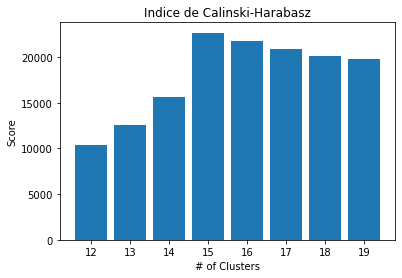

Nombre clusters =  15
nb clusters =  15 , runtime =  5601.56  ms


In [14]:
print("KMEDOIDS")
nbClusterKMedoids = displayKmedoidsSilScore(dataX1,12,20)

runtime =  313.76  ms


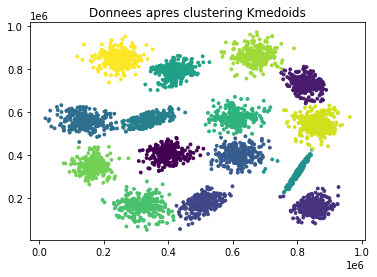

nb clusters =  15 , nb iter =  2 , runtime =  303.43  ms


In [15]:
tps1 = time.time()
temp = kmedoid(nbClusterKMedoids,dataX1)
tps2 = time.time()
print("runtime = ",round((tps2-tps1)*1000,2)," ms")
displayK(temp,"Kmedoids")

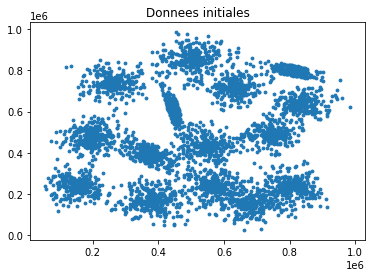

KMEAN
Silhouette SCORE :


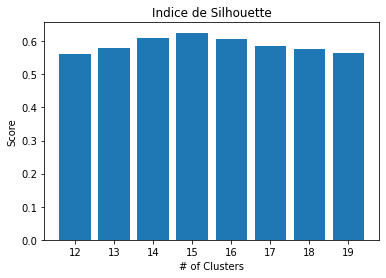

Nombre clusters =  15

Davies-Bouldin SCORE :


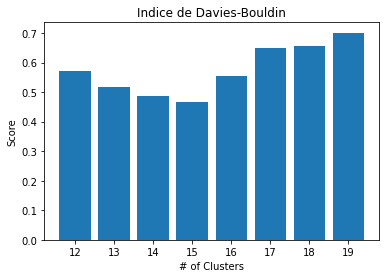

Nombre clusters =  15

Calinski-Harabasz SCORE :


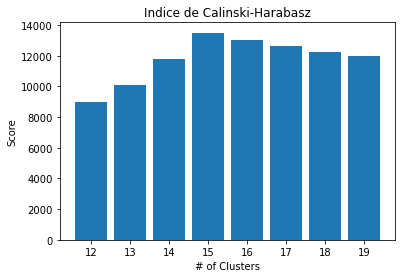

Nombre clusters =  15
nb clusters =  15 , runtime =  5939.2  ms
runtime =  318.84  ms


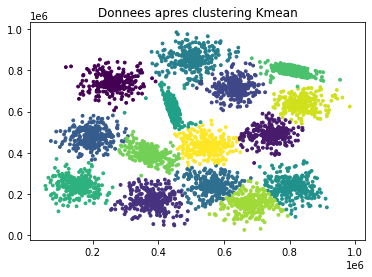

nb clusters =  15 , nb iter =  4 , runtime =  318.84  ms
KMEDOIDS
Silhouette SCORE :


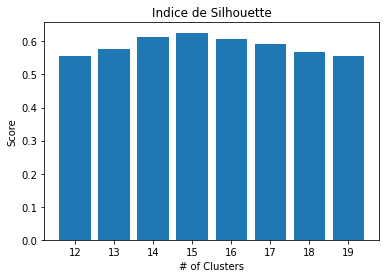

Nombre clusters =  15

Davies-Bouldin SCORE :


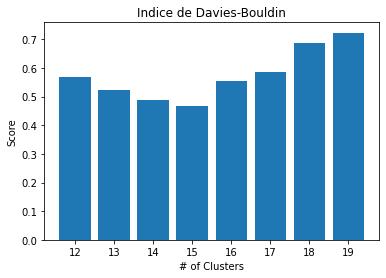

Nombre clusters =  15

Calinski-Harabasz SCORE :


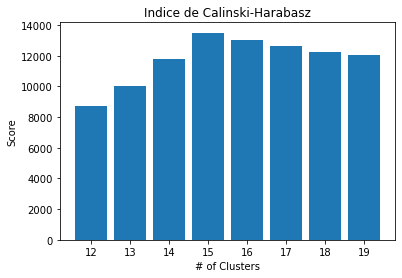

Nombre clusters =  15
nb clusters =  15 , runtime =  5990.56  ms
runtime =  355.28  ms


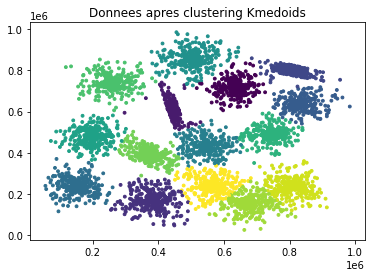

nb clusters =  15 , nb iter =  3 , runtime =  344.5  ms
Silhouette SCORE :


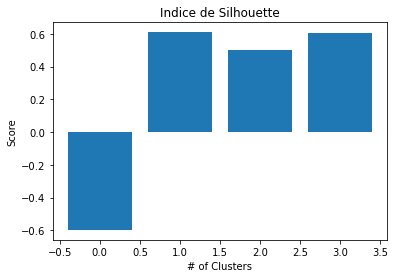

Nombre clusters =  1


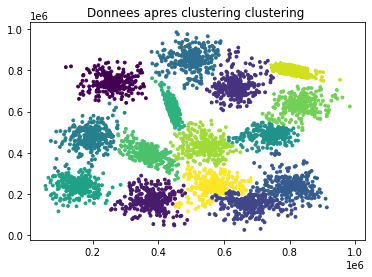

nb clusters =  1 , runtime =  4241.46  ms


In [16]:
dataX2 = importData("x2")
print("KMEAN")
nbClusterKMean = displayKmeanSilScore(dataX2,12,20)
tps1 = time.time()
temp = kmean(nbClusterKMean,dataX2)
tps2 = time.time()
print("runtime = ",round((tps2-tps1)*1000,2)," ms")
displayK(temp,"Kmean")


print("KMEDOIDS")
nbClusterKMedoids = displayKmedoidsSilScore(dataX2,12,20)
tps1 = time.time()
temp = kmedoid(nbClusterKMedoids,dataX2)
tps2 = time.time()
print("runtime = ",round((tps2-tps1)*1000,2)," ms")
displayK(temp,"Kmedoids")
displayClusterScore(dataX2,nbClusterKMean)

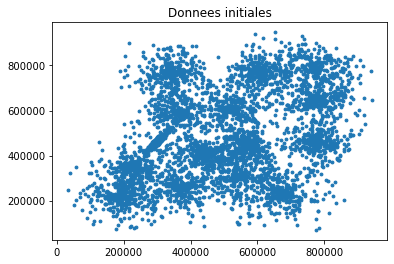

KMEAN
Silhouette SCORE :


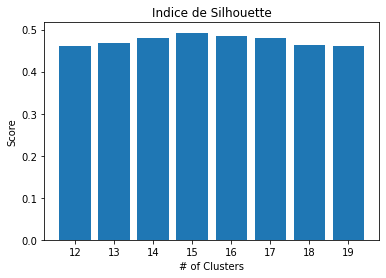

Nombre clusters =  15

Davies-Bouldin SCORE :


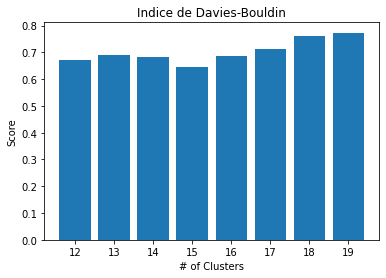

Nombre clusters =  15

Calinski-Harabasz SCORE :


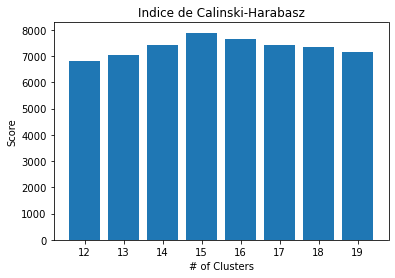

Nombre clusters =  15
nb clusters =  15 , runtime =  5800.73  ms
runtime =  320.06  ms


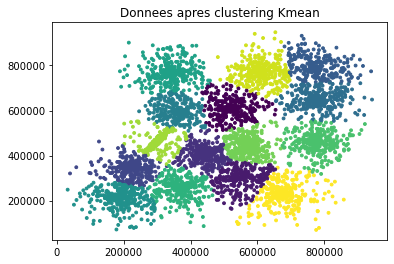

nb clusters =  15 , nb iter =  7 , runtime =  320.06  ms
KMEDOIDS
Silhouette SCORE :


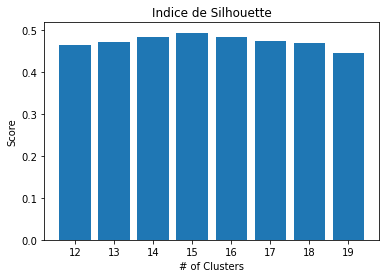

Nombre clusters =  15

Davies-Bouldin SCORE :


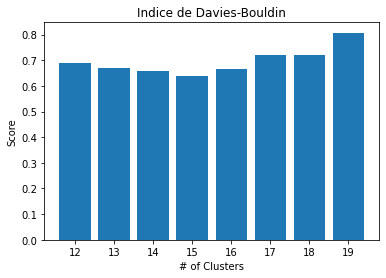

Nombre clusters =  15

Calinski-Harabasz SCORE :


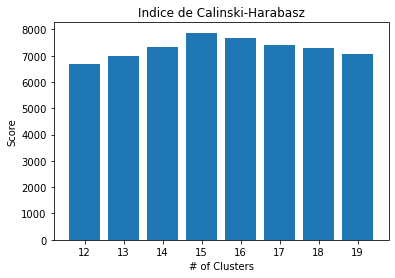

Nombre clusters =  15
nb clusters =  15 , runtime =  5947.16  ms
runtime =  317.11  ms


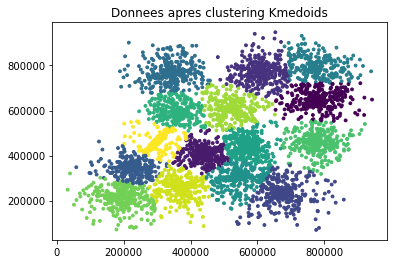

nb clusters =  15 , nb iter =  2 , runtime =  309.12  ms
Silhouette SCORE :


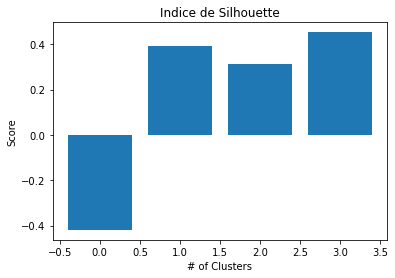

Nombre clusters =  3


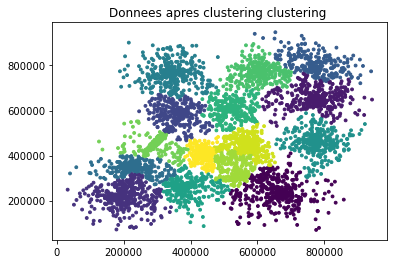

nb clusters =  3 , runtime =  4164.91  ms


In [17]:
dataX3 = importData("x3")
print("KMEAN")
nbClusterKMean = displayKmeanSilScore(dataX3,12,20)
tps1 = time.time()
temp = kmean(nbClusterKMean,dataX3)
tps2 = time.time()
print("runtime = ",round((tps2-tps1)*1000,2)," ms")
displayK(temp,"Kmean")


print("KMEDOIDS")
nbClusterKMedoids = displayKmedoidsSilScore(dataX3,12,20)
tps1 = time.time()
temp = kmedoid(nbClusterKMedoids,dataX3)
tps2 = time.time()
print("runtime = ",round((tps2-tps1)*1000,2)," ms")
displayK(temp,"Kmedoids")
displayClusterScore(dataX3,nbClusterKMean)

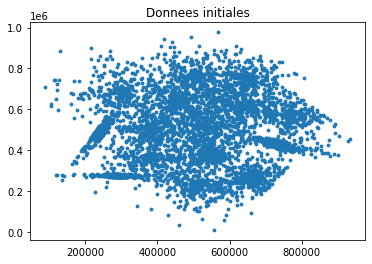

KMEAN
Silhouette SCORE :


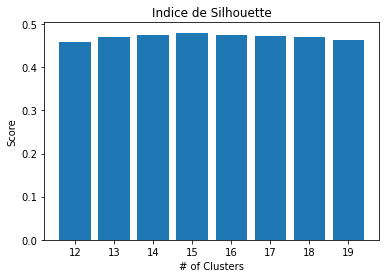

Nombre clusters =  15

Davies-Bouldin SCORE :


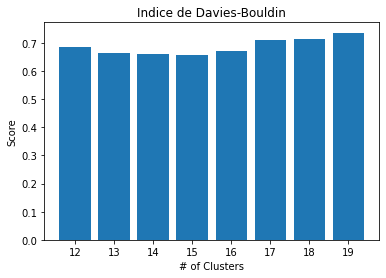

Nombre clusters =  15

Calinski-Harabasz SCORE :


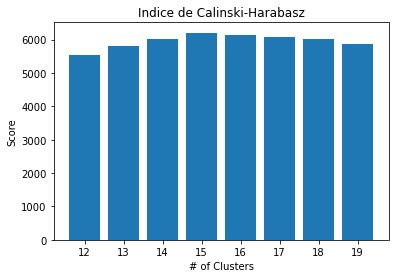

Nombre clusters =  15
nb clusters =  15 , runtime =  5773.47  ms
runtime =  321.61  ms


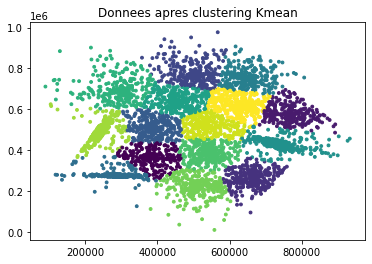

nb clusters =  15 , nb iter =  13 , runtime =  321.61  ms
KMEDOIDS
Silhouette SCORE :


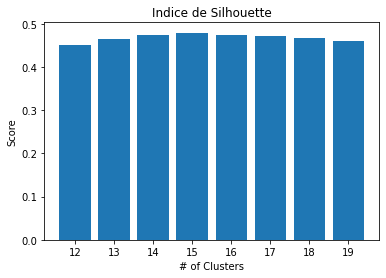

Nombre clusters =  15

Davies-Bouldin SCORE :


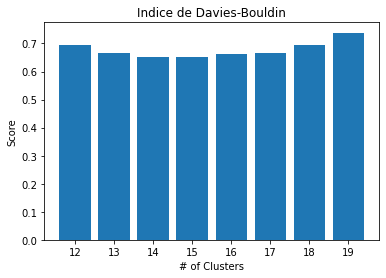

Nombre clusters =  15

Calinski-Harabasz SCORE :


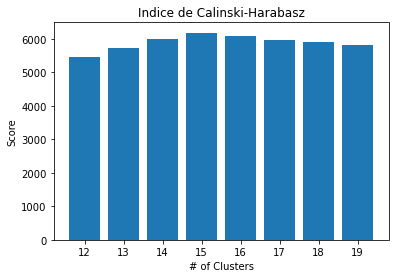

Nombre clusters =  15
nb clusters =  15 , runtime =  5731.6  ms
runtime =  338.77  ms


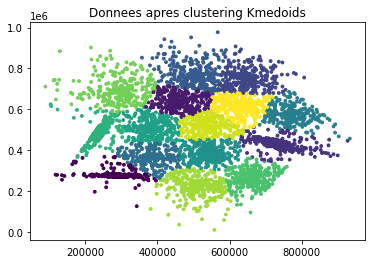

nb clusters =  15 , nb iter =  3 , runtime =  329.26  ms
Silhouette SCORE :


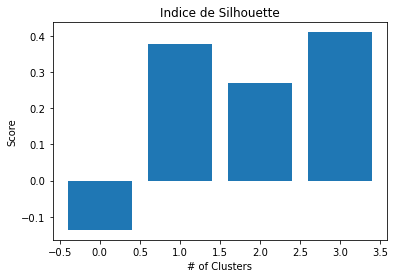

Nombre clusters =  3


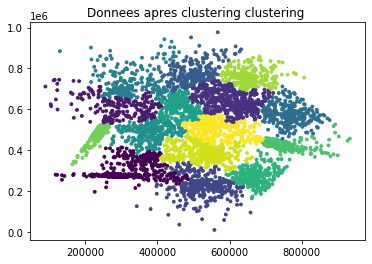

nb clusters =  3 , runtime =  4357.59  ms


In [18]:
dataX4 = importData("x4")
print("KMEAN")
nbClusterKMean = displayKmeanSilScore(dataX4,12,20)
tps1 = time.time()
temp = kmean(nbClusterKMean,dataX4)
tps2 = time.time()
print("runtime = ",round((tps2-tps1)*1000,2)," ms")
displayK(temp,"Kmean")
print("KMEDOIDS")
nbClusterKMedoids = displayKmedoidsSilScore(dataX4,12,20)
tps1 = time.time()
temp = kmedoid(nbClusterKMedoids,dataX4)
tps2 = time.time()
print("runtime = ",round((tps2-tps1)*1000,2)," ms")
displayK(temp,"Kmedoids")
displayClusterScore(dataX4,nbClusterKMean)

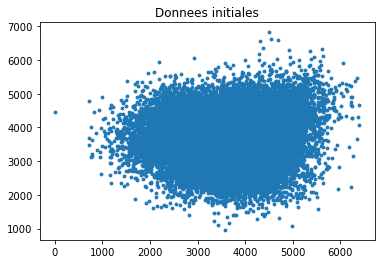

KMEAN
Silhouette SCORE :


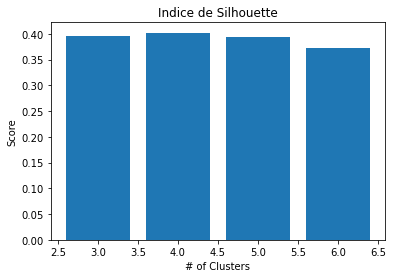

Nombre clusters =  4

Davies-Bouldin SCORE :


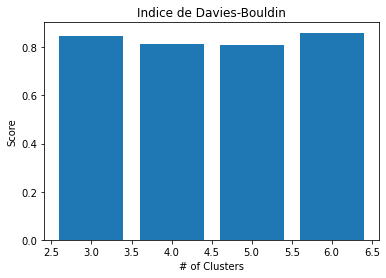

Nombre clusters =  5

Calinski-Harabasz SCORE :


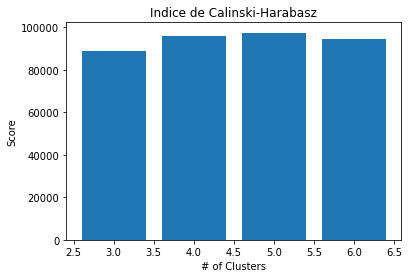

Nombre clusters =  5
nb clusters =  5 , runtime =  421225.97  ms
runtime =  653.78  ms


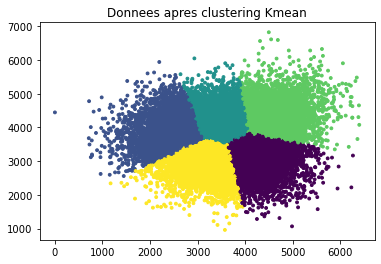

nb clusters =  5 , nb iter =  10 , runtime =  653.78  ms
KMEDOIDS


MemoryError: Unable to allocate 41.5 GiB for an array with shape (5575627200,) and data type float64

In [19]:
dataY1 = importData("y1")
print("KMEAN")
nbClusterKMean = displayKmeanSilScore(dataY1,3,7)
tps1 = time.time()
temp = kmean(5,dataY1)
tps2 = time.time()
print("runtime = ",round((tps2-tps1)*1000,2)," ms")
displayK(temp,"Kmean")
print("KMEDOIDS")
#nbClusterKMedoids = displayKmedoidsSilScore(dataY1,2,5)
#displayK(kmedoid(nbClusterKMedoids,dataY1),"Kmedoids")
displayClusterScore(dataY1,nbClusterKMean)

In [ ]:
dataZZ1 = importData("zz1")
print("KMEAN")
nbClusterKMean = displayKmeanSilScore(dataZZ1,4,10)
tps1 = time.time()
temp = kmean(nbClusterKMean,dataZZ1)
tps2 = time.time()
print("runtime = ",round((tps2-tps1)*1000,2)," ms")
displayK(temp,"Kmean")
print("KMEDOIDS")
nbClusterKMedoids = displayKmedoidsSilScore(dataZZ1,4,10)
tps1 = time.time()
temp = kmedoid(nbClusterKMedoids,dataZZ1)
tps2 = time.time()
print("runtime = ",round((tps2-tps1)*1000,2)," ms")
displayK(temp,"Kmedoids")
displayClusterScore(dataZZ1,nbClusterKMean)

In [ ]:
dataZZ2 = importData("zz2")
print("KMEAN")
nbClusterKMean = displayKmeanSilScore(dataZZ2,4,10)
tps1 = time.time()
temp = kmean(nbClusterKMean,dataZZ2)
tps2 = time.time()
print("runtime = ",round((tps2-tps1)*1000,2)," ms")
displayK(temp,"Kmean")
print("KMEDOIDS")
nbClusterKMedoids = displayKmedoidsSilScore(dataZZ2,4,10)
tps1 = time.time()
temp = kmedoid(nbClusterKMedoids,dataZZ2)
tps2 = time.time()
print("runtime = ",round((tps2-tps1)*1000,2)," ms")
displayK(temp,"Kmedoids")
displayClusterScore(dataZZ2,nbClusterKMean)